In [68]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

def angular_cut(image, angle, increment = None, stop = None,
                    mute_graph = False, v_min = None, v_max = None, num =1000):
        """
        Take angled cut or multiple incremented cuts of a image data.

        Parameters
        ----------
        image : ndarray
            Image data
        angle : float
            Desired angle for cut to be taken counter-clockwise from the horizontal axis
        increment : float
            The angular increment between line cuts if more than one is desired
        stop : float
            Maximum value for a set of incremented cuts
        mute_graph : boolean
            Mute the image and intensity plot
        v_min, v_max : float
            Set limits for matplotlib color map values
        num : float
            Number of intensity data points sampled between endpoints of angular cut

        Returns
        -------
        data : list
            A list of tuples that contains data from each cut. Each tuple
            contains the angle of the cut taken, an array of the intensity
            values sampled along the line cut and an array of the
            corresponding radii relative to center at each point sampled
            along the line cut.

        """
        height = image.shape[0]
        width = image.shape[1]
        center_x = (width - 1)/2.0
        center_y = (height - 1)/2.0
        if mute_graph == False:
            fig, axes = plt.subplots(nrows=2, figsize = (10,10))
            axes[0].scatter(center_x, center_y, s= 50, c='red')

        curr = angle
        data = []

        t = image

        while True:
            q = -1

            theta = curr*(np.pi)/180

            threshold = np.arctan(height/width)

            row0 = 0 #two endpoints of line at angle theta
            col0 = 0

            row1 = 0
            col1 = 0
            if theta >= np.pi:
                theta = theta - np.pi
            if theta > threshold or theta <= np.pi - threshold:
                row0 = 0
                row1 = height - 1
                col0 = int((width/2)+(height/2)*np.tan((np.pi/2) - theta))
                col1 = int((width/2)-(height/2)*np.tan((np.pi/2) - theta))
                if col1 >= height:
                    col1 -= 1
            if theta <= threshold:
                row0 = int((height/2) - (width/2)*np.tan(theta))
                row1 = int((height/2) + (width/2)*np.tan(theta))
                if row1 >= height:
                    row1 -= 1
                col0 = width - 1
                col1 = 0

            if theta > np.pi - threshold:
                row0 = int((height/2) + (width/2)*np.tan(theta))
                row1 = int((height/2) - (width/2)*np.tan(theta))
                col0 = 0
                col1 = width - 1

            r, c = np.linspace(row0, row1, num), np.linspace(col0, col1, num) #sample 1000 points between endpoints
            im_slice = t[r.astype(np.int), c.astype(np.int)]  #extract data from these indexed locations
            im_slice = im_slice[::q]
            radius = []
            grid = radial_grid(center = (center_y, center_x), shape = (height, width))

            for i in range(len(r)):
                p1 = int(r[i])
                p2 = int(c[i])
                rad = grid[p1][p2]
                radius.append(rad)

            radius = radius[::q]

            if mute_graph == False:
                if(v_min != None and v_max != None):
                    axes[0].imshow(t, vmin= v_min,vmax =  v_max)
                else:
                    axes[0].imshow(t)

                axes[0].plot([col0, col1], [row0, row1], 'ro-')
                axes[0].axis('image')

                axes[1].plot(radius, im_slice)
                plt.xlabel("Radius", fontsize = 15)
                plt.ylabel("Intensity", fontsize = 15)

            data.append((curr, im_slice, radius))

            if increment == None:
                break
            if curr + increment > stop:
                break
            curr = curr + increment

        if(mute_graph == False and center_x != None and center_y != None):
                    axes[0].scatter(center_x, center_y, s= 50, c='red')
        plt.show()
        return data


In [76]:
x = np.linspace(-5,5,200)
X,Y = np.meshgrid(x,x)
Z = 100*np.cos(np.sqrt(x**2 + Y**2))**2 + 50

### Take a cut at 25 degrees, sample the values underneath 

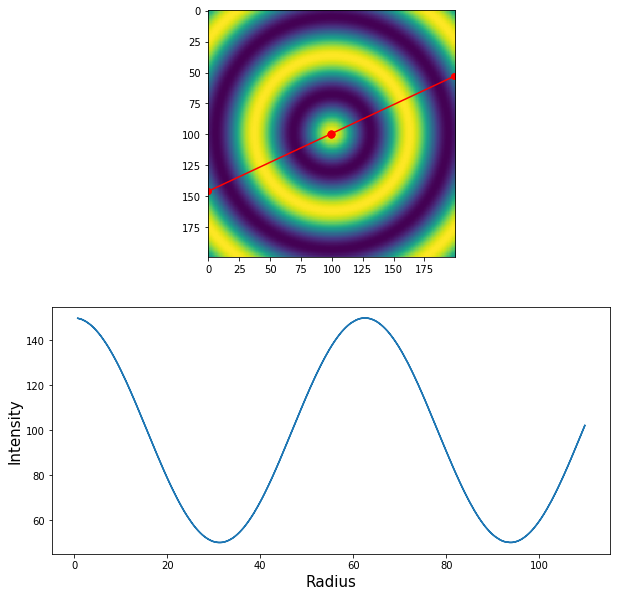

In [77]:
t1 = angular_cut(image = Z, angle = 25.0, v_min = 50, v_max = 150)

### Take incremented cuts and return list of tuples of the data for each line

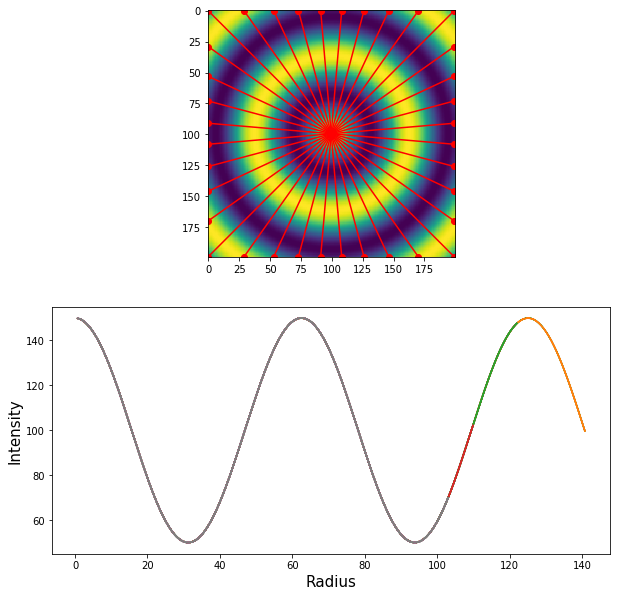

In [78]:
t2 = angular_cut(image = Z, angle = 25, increment = 10, stop = 200, v_min = 50.2, v_max = 150, num = 1000)

In [82]:
x1 = np.linspace(-7,7,280)
y1 = np.linspace(-5,5,200)
X1,Y1 = np.meshgrid(x1,y1)
Z1 = 100*np.cos(np.sqrt(X1**2 + Y1**2))**2 + 50

### Compatible with asymmetric image dimensions

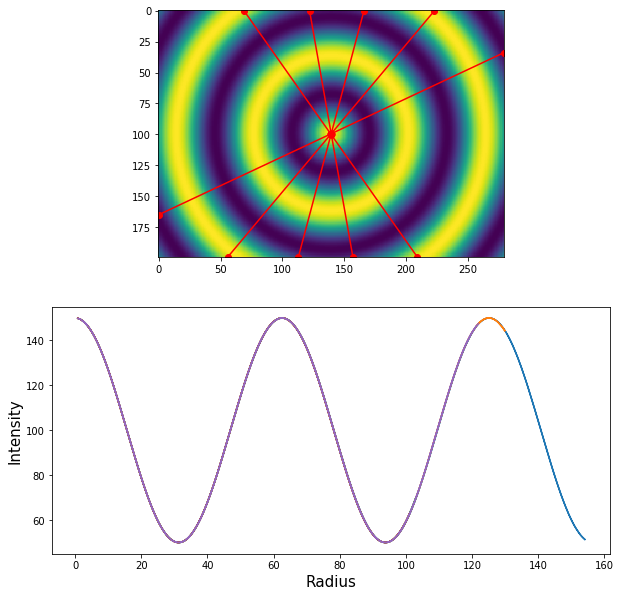

In [83]:
t3 = angular_cut(image = Z1, angle = 25, increment = 25, stop = 130, v_min = 50, v_max = 150)